# Признаки

Пензин М.С.

penzin.ml.tsu@gmail.com

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Извлечение признаков

**Feature Extraction** - на практике, редко данные уже подготовлены в удобном виде, так что обычно первым этапом становится извлечение признаков.

## Текст

Одним из часто используемых источников данных является текст.

Первым этапом при обработке текста является его токенизация (разбиение на отдельным токены).

Следующим этапом нередко выступает стемминг (stemming) или лемматизация (lemmatization), то есть приведение к нормальной форме.

Stemming - отсечение от слова ненужных честей (окончаний, суффиксов), приводя его к основе (например *кошка* превращается в _кош_)

Lemmatizaion - приведение слова к его нормальной(словарной) форме (например, существительное в именительном падеже и единственном числе).

Реализации:

* __[MyStem](https://tech.yandex.ru/mystem/)__
* __[TreeTagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/)__
* и т.д.

## Bag of Words

Текст представляется в виде словаря, состоящего из слова и количества вхождения этих слов в документ.

Далее, мы может завезти вектор длиною в словарь всех слов, при этом на соответствующую позицию в этом векторе ставится число вхождений слова в документ.

In [5]:
from collections import defaultdict

def BoW(text):    
    result = defaultdict(int)
    tokens = text.replace(".", "").replace(",", "").split()
    for token in tokens:
        result[token] += 1
    return result


def vectorization(bow, dictionary):
    return [bow[token] for token in dictionary]    

In [6]:
text1 = "John likes to watch movies. Mary likes movies too."
text2 = "John also likes to watch football games."

bow1 = BoW(text1)
bow2 = BoW(text2)
bow1

defaultdict(int,
            {'John': 1,
             'likes': 2,
             'to': 1,
             'watch': 1,
             'movies': 2,
             'Mary': 1,
             'too': 1})

In [7]:
dictionary = set(list(bow1.keys()) + list(bow2.keys()))
dictionary = list(dictionary)
dictionary.sort()
dictionary

['John',
 'Mary',
 'also',
 'football',
 'games',
 'likes',
 'movies',
 'to',
 'too',
 'watch']

In [8]:
print(vectorization(bow1, dictionary))
print(vectorization(bow2, dictionary))

[1, 1, 0, 0, 0, 2, 2, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1]


In [10]:
# или тоже самое, но с помощью sklearn

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform([text1, text2]).toarray()

array([[0, 0, 0, 1, 2, 1, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 1]])

Таким образом, у нас есть способ описать текст, но при этом мы полностью теряем порядок слова. Также, некоторые токены могут встречатся довольно часто, но при этом не нести существенной пользы, т.н. стоп-слова.

## TF-IDF

Можно использовать оценку важности слова в контексте документа, являющегося частью коллекции документов - __[TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF)__.

Данная метрика состоит из TF (какую часть документа состовляет конкретное слово)

$$
TF(w,d) = \frac{ n_w }{ \sum_k n_k }
$$

И IDF (обратная частота встречи слова на всех документах)

$$
IDF(w, D) = \log \frac{\text{кол-во документов}
}{
\text{кол-во документов со словом w}
}
$$

Итого

$$
TF-IDF(w, d, D) = TF(w,d) \cdot IDF(w,D)
$$

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## N-граммы

Чтобы учитывать порядок, можно использовать **N-граммы** (комбинации из N последовательных токенов).

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


## Hashing trick

Вместо построения довольно большого словаря, можно во время векторизации использовать хэш функцию для отображения токенов на вектор фиксированной длины.

Из минусы: возможны коллизии и нельзя произвести обратное преобразование.

In [38]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=4)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[-0.89442719  0.4472136   0.          0.        ]
 [-0.81649658  0.40824829  0.          0.40824829]
 [-0.70710678  0.70710678  0.          0.        ]
 [-0.89442719  0.4472136   0.          0.        ]]


и множество вариаций Bag-of-Words

## Word embedding

В целом это похоже на Hashing Trick, так как позволяет отобразить слово или фразу в векторное пространство заданной размерности. Существенным отличием является то, что это делает довольно специфическим образом, чтобы сохранить или отобразить смысл слова или фразы.

Есть множество готовых реализаций такого подхода.

<center>
    <img src="https://miro.medium.com/max/3902/1*hELlVp9hmZbDZVFstS61pg.png">
</center>

## Изображения

В настоящее время, очень популярен способ генерации признаков с помощью сверточных нейронных сетей.

Также можно генерировать различные признаки из изображения: извлечение текста, гистограммы, мета-информация и т.д.

## Дата и время

Несмотря на то, что дата и время активно используются, есть достаточное количество особенностей анализа даты и времени как признаков.

Логично предположить, что день недели - это категориальная переменная, которую можно закодировать one-hot кодированием.

В ряде задач ещё может понадобавится учитывать события, происходящие в указанный день: праздники, показ финальной версии телешоу и т.д.

Под это стоит завести отдельный бинарный признак.

А вот с количественными характеристиками времени (секунды, часы, дни, года и т.д.) есть множество проблем.

Если смотреть на них как на обычные число, то 10 мин. < 50 мин., но при этом 12:10 > 6:50.

Если относится к ним, как категориальным признакам, то мы получаем кучу признаков в которых разница между 22 и 23 такая же, как и между 23 и 7.

Есть довольно экзотический подход. Можно проецировать на окружность.

Данное преобразование сохраняет расстояние между точками.

In [11]:
def harmonic_features(val, period):
    val *= 2 * np.pi / period
    return np.array([[np.cos(val), np.sin(val)]])

In [12]:
from sklearn.metrics.pairwise import paired_euclidean_distances

print(paired_euclidean_distances(
    harmonic_features(5, 24), harmonic_features(12, 24))
)

print(paired_euclidean_distances(
    harmonic_features(22, 24), harmonic_features(5, 24))
)

[1.58670668]
[1.58670668]


В остальном, нужно внимательно рассмотреть данные и возможно преобразовать их к другому виду (возможно имеет смысл разница времени между двумя событиями или только событие происходящее в этот день). Например: сезонность, праздники, временной промежуток от какого-то события и т.д.

## Категориальные признаки

При работе с категориальными признаками нужно внимательно предварительно изучить их распределения. По результатам нередко можно убрать неиспользуемые категории, либо объединить очень редкие категории в одну общую.

## Label Encoding

В данном варианте кодирования, мы просто каждой категории сопоставляем уникальное число. Данное кодирование вводит некую алгебру для категорий, что приводит к тому, что для моделей, где расстояние между объектами имеет значение, это будет вносить фиктивную информацию.

In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
print(list(le.classes_))
print(le.transform(["tokyo", "tokyo", "paris"]))
list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']

['amsterdam', 'paris', 'tokyo']
[2 2 1]


['tokyo', 'tokyo', 'paris']

## One-hot кодирование

Мы с ним уже знакомы, в данном случае мы просто кодируем каждое значение категориального признака, новым бинарным dummy-признаком.

Есть различные варианты кодирования: можно кодировать одну из категорий нулевыми значениями, BaseN и т.д.

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
print(enc.categories_)
print(enc.transform([['Female', 1], ['Male', 4]]))
print(enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]]))

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
[[1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
[['Male' 1]
 [None 2]]


In [15]:
from sklearn.compose import ColumnTransformer

# можем только конкретные столбцы преобразовать
cf = ColumnTransformer([
    ("dummy", OneHotEncoder(handle_unknown='ignore'), [0]),
], remainder="passthrough")

cf.fit_transform(X)

array([[0.0, 1.0, 1],
       [1.0, 0.0, 3],
       [1.0, 0.0, 2]], dtype=object)

## Hashing Trick

В случае, когда уникальных  значений категориальных признаков очень много, то практически это единственный вариант.

Мы просто отображаем значение категориального признака на вектор бинарных размеров фиксированного размера.

In [88]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features=10, input_type='string')
D = ['dog', 'cat', 'elephant']
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.],
       [ 1.,  0.,  1.,  0., -1., -1., -1.,  0.,  0.,  1.]])

**Альтернатива:** Использовать Embeddings или PCA.

## Хитрые способы

В ряде случаев, можно заменить значения категориальных признаков на интерпретируемые значения. 

Например, удобно кодировать категорию товара средним значением стоимости товара в этой категории.

Можно кодировать категорию числом её вхождения в данные.

Также можно кодировать средним значением целевой переменной (главное при этом для кодирования использовать только данные из обучающей выборки и не использовать данные из тестовой)

## Количественные признаки

## Дискретизация

Иногда, можно заменить количественные данные на категориальные в виде: "Это значение больше Х?" или "Это значение между Х и Y?"

## Нормализация

$$
\vec{x}_n = \frac{\vec{x} - \vec{x}_{min}}{\vec{x}_{max} - \vec{x}_{min}}
$$

Класс: MinMaxScaler

## Стандартизация

$$
\vec{x}_s = \frac{\vec{x} - \vec{\mu}}{\vec{\sigma}}
$$

Класс: StandardScaler

## RobustScaler

Из-за выбросов, иногда лучше использовать медиану вместо среднего значения и квантильный интервал вместо дисперсии (от первого квартиля до третьего).

Класс: RobustScaler

## Трансформация

Нередко, количественные признаки могут описываться логнормальным распределением (или иметь просто иметь существенный "хвост").

Самый простой вариант - это взятие натурального логарифма, что делает признак нормально распределенным.

Преобразование Бокса-Кокса

$$
\vec{x}_{bk} = \left\{ \begin{align}
    \frac{
        (\vec{x} + \alpha)^\lambda - 1
    }{
        \lambda
    }, \text{ если } \lambda \ne 0,\\
    \ln(\vec{x} + \alpha), \text{ если } \lambda = 0,
\end{align} \right.
$$

Преобразование Йео-Джонсона
$$
\vec{x}_{yj} = \left\{ \begin{align}
    (\vec{x} + 1)^\lambda - 1 / \lambda, \text{ если } \lambda \ne 0, y \ge 0
    \\
    \ln(\vec{x} + 1), \text{ если } \lambda = 0, y \ge 0, 
    \\
    -\left[(-\vec{x} + 1)^{2-\lambda} - 1 \right]/ (2 - \lambda), \text{ если } \lambda \ne 2, y < 0
    \\
    -\ln(-\vec{x} + 1), \text{ если } \lambda = 2, y < 0,    
\end{align} \right.
$$

В sklearn для этого есть класс **PowerTransformer**.

In [40]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = [[1, 2], [3, 2], [4, 5]]
print(pt.fit(data))
print(pt.lambdas_)
print(pt.transform(data))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
[ 1.38668178 -3.10053309]
[[-1.31616039 -0.70710678]
 [ 0.20998268 -0.70710678]
 [ 1.1061777   1.41421356]]


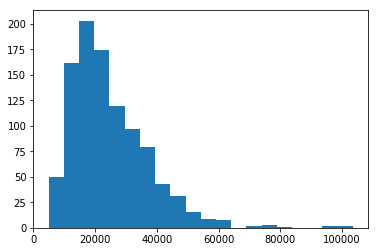

In [69]:
from numpy.random import lognormal

x = lognormal(10, 0.5, 1000)
plt.hist(x, bins=20);

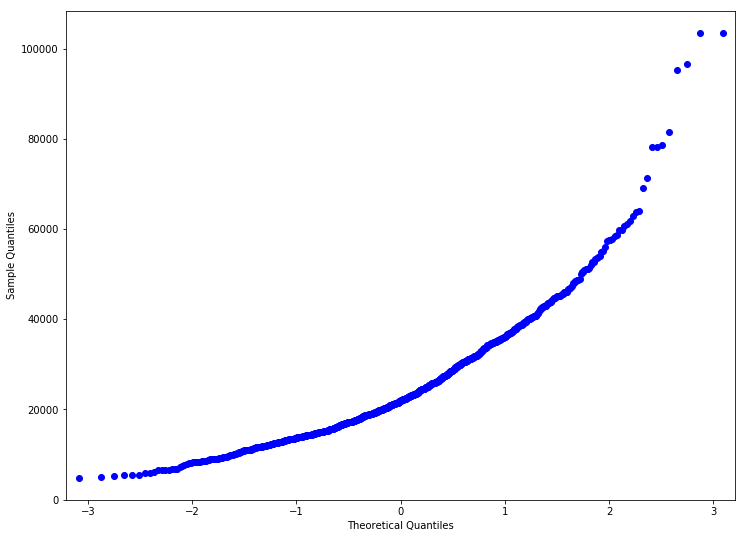

In [73]:
sm.qqplot(x, loc=x.mean(), scale=x.std());

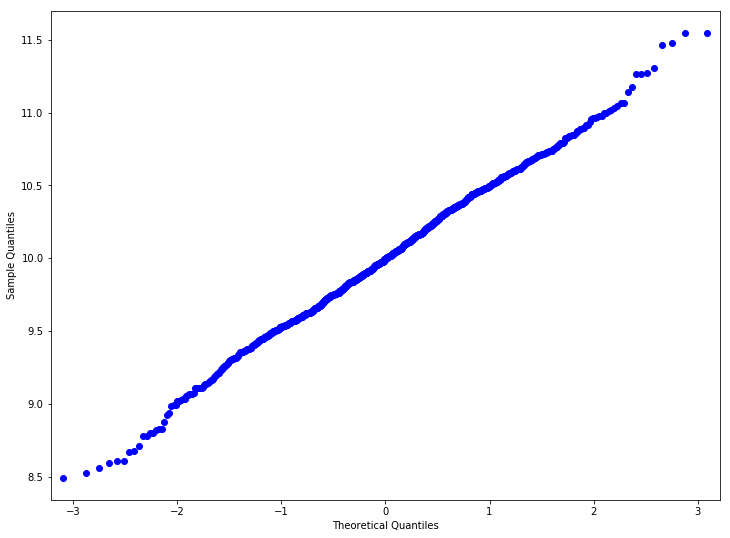

In [74]:
nx = np.log1p(x)
sm.qqplot(nx, loc=nx.mean(), scale=nx.std());

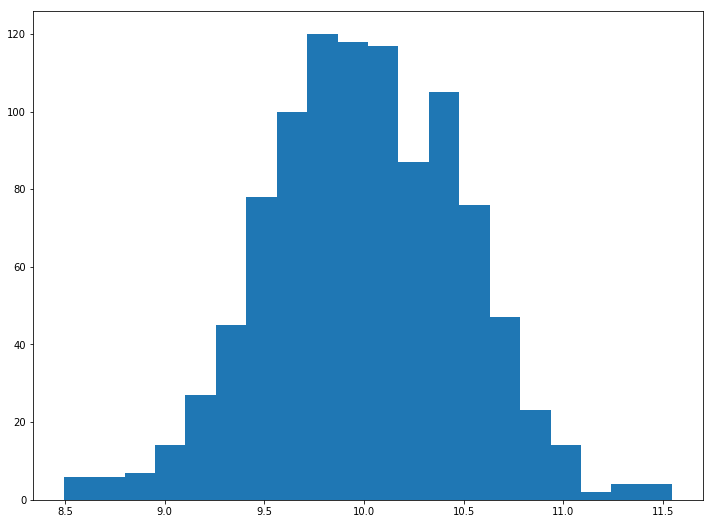

In [75]:
plt.hist(nx, bins=20);

In [85]:
from scipy.stats import skew 
print(skew(x))
print(skew(nx))

from sklearn.preprocessing import power_transform
bx = power_transform(x.reshape((-1, 1)), method='box-cox').ravel()
print(skew(bx))

1.6855334613523818
-0.057123408215205985
0.00036194487820792896


## Генерация новых признаков

Иногда, различного рода комбинации признаков могут нести гораздо большую информацию, чем эти же признаки по отдельности.

Можно рассматривать различные комбинации признаков: сложение/вычитание, перемножение и т.д.

## Пропуски в данных

Для категориальных данных: закодировать N/A отдельной категорией, либо заменить на наиболее вероятный.

Для количественных: взять среднее или медиану (в группе или на всех данных), взять соседнее значение.

## Отбор признаков

Если значение признака почти не меняется - его можно убрать.

Можно отобрать выжные признаки на основе __[статистики](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)__

Можно отбирать признаки с помощью деревьев, либо LASSO.


Также может иметь место банальный перебор.

In [113]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


## Временные ряды

Временной ряд - данные полученные с каким-то фиксированным интервалом времени.

Во временных данных, у нас данные обычно зависят от предыдущих значений.

In [89]:
df = pd.read_csv("../data/AirPassengers.csv", 
                 index_col="Month", 
                 parse_dates=['Month'], dayfirst=False)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


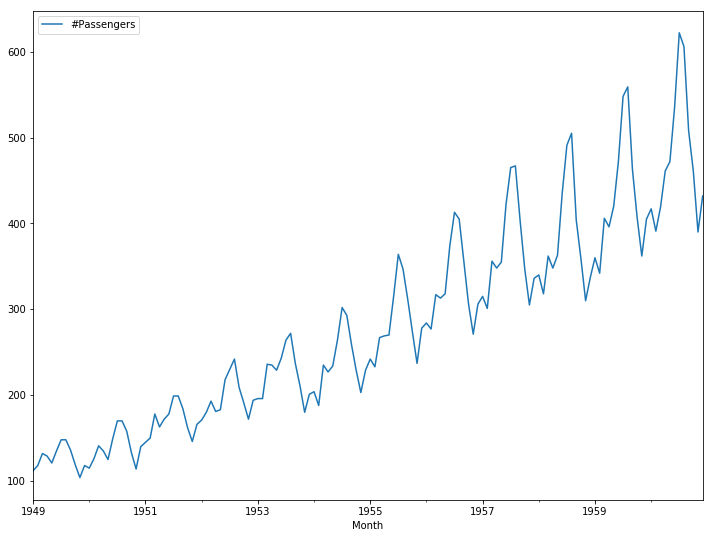

In [92]:
df.plot();

## ARMA

$$
y_t = c + \varepsilon_t 
+ \sum_{p = 1}^{P} \alpha_p y_{t - p} 
+ \sum_{q = 1}^{Q} \beta_q \varepsilon_{t-q}
$$

фактически берем в качестве признаков предыдущие значения + минимизируем средний шум

Если ввести оператор лага ($L y_t = y_{t-1}$)

$$
(1 - \sum_{p=1}^P \alpha_p L) y_t = (1 + \sum_{q=1}^Q \beta_q L) \varepsilon_t
$$

## ARIMA

$$
(1 - \sum_{p=1}^P \alpha_p L) (1 - L)^d y_t = (1 + \sum_{q=1}^Q \beta_q L) \varepsilon_t
$$

вместо рассмотрения предыдущих значений, смотрим разность между отсчетами

## Сглаживание

* медианное - берем медиану внутри окна
* среднее - берем среднее значение внутри окна
* экспоненциальное $y_t = \alpha y_t + (1-\alpha) y_{t-1}$
* и т.д.

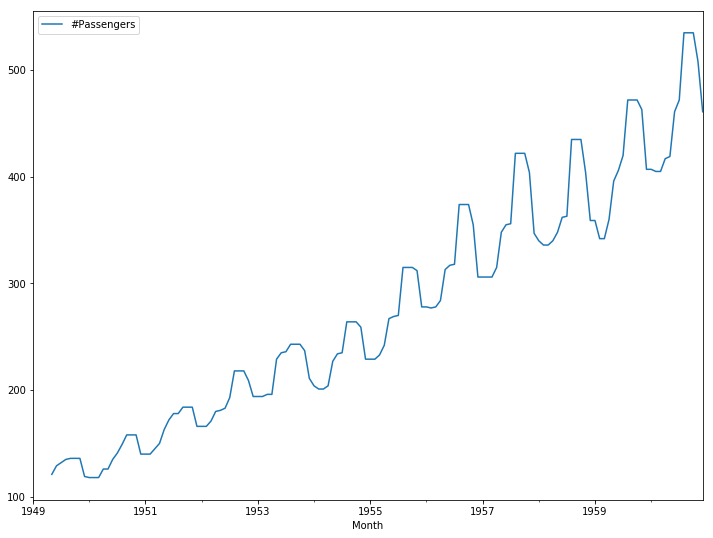

In [95]:
df.rolling(5).median().plot();

## Почитать

* Магнус Я.Р., Катышев П.К., Пересецкий А.А. **Эконометрика**
* __[Rob J Hyndman. Forecasting: Principles and Practice](https://otexts.com/fpp2/)__
* __[statsmodel](https://www.statsmodels.org/stable/index.html)__